In [15]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [16]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
from skimage import transform
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
import random
import math

# D**ata Loading**

In [5]:
train_dataset = dsets.FashionMNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.FashionMNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

Processing...
Done!


In [6]:
print(train_dataset.train_data.size())

torch.Size([60000, 28, 28])


In [7]:
print(train_dataset.train_labels.size())

torch.Size([60000])


In [8]:
print(test_dataset.test_data.size())

torch.Size([10000, 28, 28])


In [9]:
print(test_dataset.test_labels.size())

torch.Size([10000])


In [10]:
batch_size = 100
n_iters = 4000
num_epochs = n_iters/(len(train_dataset)/batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)



# **Visualizing Dataset**

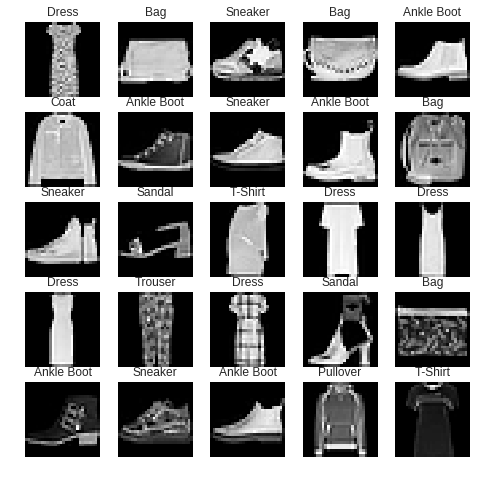

In [11]:
import matplotlib.pyplot as plt
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
fig = plt.figure(figsize=(10, 10))  # width and height of images
columns = 6
rows = 6
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

# **Creating model class**

In [12]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #Convolution 1
        self.cn1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),      #Normalization
            nn.ReLU(),
            nn.MaxPool2d(2))
        #Convolution 2
        self.cn2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        #Fully connected 1
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.cn1(x)
        out = self.cn2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)    # Linear function (readout)
        return out

# **Instantiate model class**

In [13]:
model = CNN()


# **Instantiate Loss class**

In [14]:
criterion = nn.CrossEntropyLoss()

# Instantiate Optimizer **class**

In [19]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# **Training the model**

In [20]:
iter = 0
losses = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = Variable(images.float())
    labels = Variable(labels)
    
    optimizer.zero_grad()
    

    outputs = model(images)
    
    
    loss = criterion(outputs, labels)
    
    
    loss.backward()
    
    
    optimizer.step()
    iter += 1
    
    
    if iter % 500 == 0:
        correct = 0
        total = 0
        for images, labels in test_loader:
         
                images = Variable(images.float())
                outputs = model(images)
          
                
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
              
                correct += (predicted == labels).sum()
                
        accuracy = 100 * correct/total
    
        print('Iteration: {}, Loss: {}, Accuracy: {}'.format(iter, loss.data[0], accuracy))
      
      
    
    
    
    
    
    

Iteration: 500, Loss: 0.3886265456676483, Accuracy: 85.97
Iteration: 1000, Loss: 0.3541938066482544, Accuracy: 86.21
Iteration: 1500, Loss: 0.28208163380622864, Accuracy: 87.52
Iteration: 2000, Loss: 0.21328270435333252, Accuracy: 87.89
Iteration: 2500, Loss: 0.2488858550786972, Accuracy: 88.31
Iteration: 3000, Loss: 0.34421852231025696, Accuracy: 88.82
Iteration: 3500, Loss: 0.3088317811489105, Accuracy: 88.81
